In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import altair as alt


In [42]:
df=pd.read_csv("SeoulBikeData.csv", encoding='ISO-8859-1')

Data Informations

In [43]:
df.head

<bound method NDFrame.head of             Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  

In [44]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [45]:
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [46]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [47]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


Data PreProccessing

In [48]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')


df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
# Results

print(df['Year'])
print(df['Day'])
print(df['Month'])


0       2017
1       2017
2       2017
3       2017
4       2017
        ... 
8755    2018
8756    2018
8757    2018
8758    2018
8759    2018
Name: Year, Length: 8760, dtype: int32
0        1
1        1
2        1
3        1
4        1
        ..
8755    30
8756    30
8757    30
8758    30
8759    30
Name: Day, Length: 8760, dtype: int32
0       12
1       12
2       12
3       12
4       12
        ..
8755    11
8756    11
8757    11
8758    11
8759    11
Name: Month, Length: 8760, dtype: int32


Clean the unnecessary collumns

In [49]:
col=['Solar Radiation (MJ/m2)','Dew point temperature(°C)','Humidity(%)']
df.drop(columns=col)
df.head

<bound method NDFrame.head of            Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0    2017-12-01                254     0             -5.2           37   
1    2017-12-01                204     1             -5.5           38   
2    2017-12-01                173     2             -6.0           39   
3    2017-12-01                107     3             -6.2           40   
4    2017-12-01                 78     4             -6.0           36   
...         ...                ...   ...              ...          ...   
8755 2018-11-30               1003    19              4.2           34   
8756 2018-11-30                764    20              3.4           37   
8757 2018-11-30                694    21              2.6           39   
8758 2018-11-30                712    22              2.1           41   
8759 2018-11-30                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0         

Graphs:

Bar Chart:

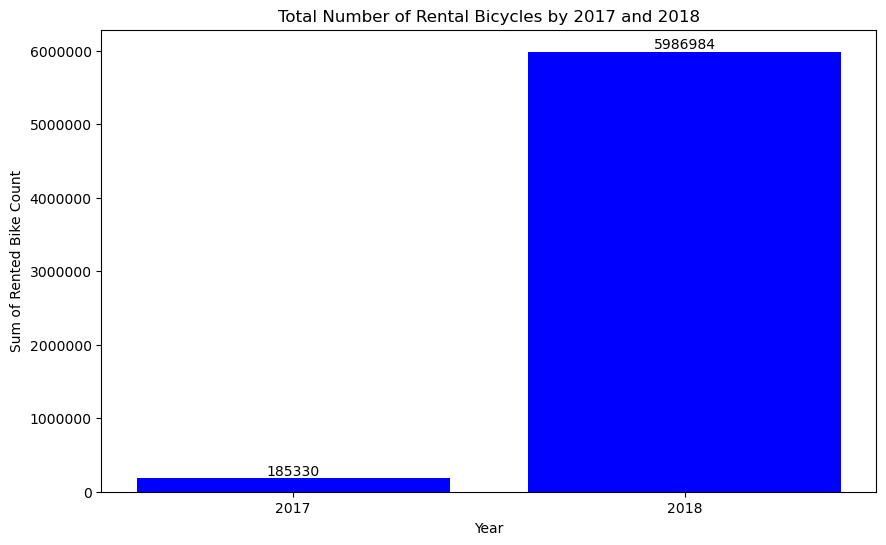

In [50]:
total_counts_by_year = df.groupby('Year')['Rented Bike Count'].sum().reset_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(x=total_counts_by_year['Year'], height=total_counts_by_year['Rented Bike Count'], color='blue')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title('Total Number of Rental Bicycles by 2017 and 2018')
plt.xlabel('Year')
plt.ylabel('Sum of Rented Bike Count')
plt.xticks(total_counts_by_year['Year'], total_counts_by_year['Year'].astype(int))

# Toplam değerleri çubukların üzerine yazma
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()


LineChart

In [52]:
total_counts_by_hour = df.groupby('Temperature(°C)')['Hour'].sum().reset_index()


fig = px.line(total_counts_by_hour, x='Temperature(°C)', y='Hour',
             labels={'Temperature(°C)': 'Temperature(°C)', 'Hour': 'Hour'},
             title='Total Cycling Hours by Temperature',)


fig.update_traces(mode='markers+lines')

fig.show()

Pie Chart

In [53]:

fig = px.pie(df, values='Hour', names='Seasons', title='Percentage of seasons affecting cycling hours',
             color_discrete_sequence=px.colors.sequential.RdBu, hole=0.2)


fig.update_traces(textposition='inside', textinfo='percent+label', pull=[0.0, 0.0, 0.0, 0.0],
                  )

fig.show()

Double Bar Chart

C:\Users\ugurc\AppData\Local\Temp\ipykernel_11868\1508061981.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




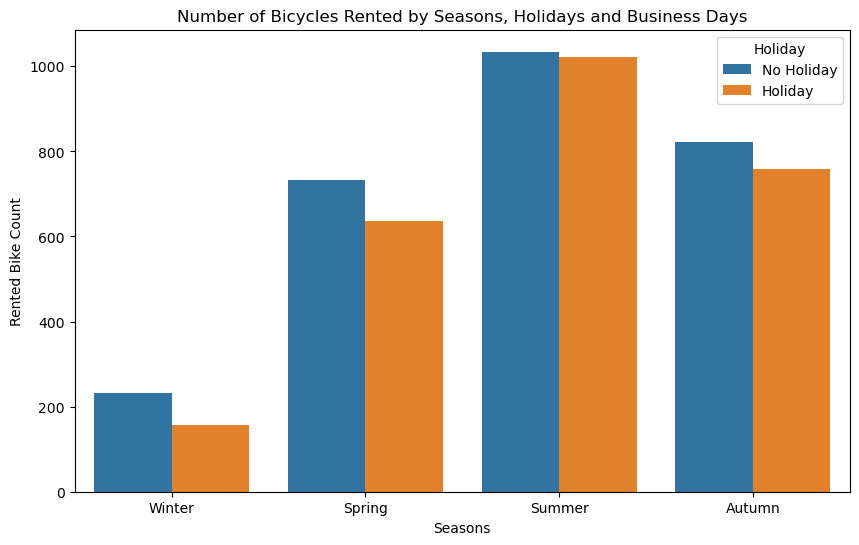

In [54]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Seasons', y='Rented Bike Count', hue='Holiday', data=df, ci=None)


plt.title('Number of Bicycles Rented by Seasons, Holidays and Business Days')
plt.xlabel('Seasons')
plt.ylabel('Rented Bike Count')
plt.legend(title='Holiday', loc='upper right')


plt.show()
